## Planar cell polarity (PCP) quantification using the data from Tissue Analyzer table.  

Tissue Analyzer is a software tool for cell segmentation, tracking and quantifications. The data from the quantification is saved in SQL data base which contains location of cells and P1_polarity annd P2_polarity. P1_polarity annd P2_polarity was described as Q!, Q2 in the paper by   In this script, I used exported P1_polarity annd P2_polarity data to quantify PCP.  

Tissue Analyzer Reference:  
https://grr.gred-clermont.fr/labmirouse/software/WebPA/index.html
Benoît Aigouy et al.(2010) Cell Flow Reorients the Axis of Planar Polarity in the Wing Epithelium of Drosophila
(https://www.sciencedirect.com/science/article/pii/S0092867410008901)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd 

In [5]:
## df = pd.read_csv("../Desktop/Cells_Fmi_PCP_plotting.csv")

In [6]:
df = pd.read_csv("../Desktop/polarity_exp2.csv") ### read the csv file table

In [7]:
df.head()
# ch2 is Fmi channel

,center_x_cells,center_y_cells,P1_polarity_ch2,P2_polarity_ch2
0,4.260870,4.840580,-0.168566,-17.106912
1,10.783854,17.703125,-15.842378,2.086137
2,5.953704,37.685185,-1.932653,-6.934113
3,5.952532,66.284810,1.550674,18.405389
4,11.172414,87.979310,53.883308,8.987848


In [2]:
#### Nematic order and PCP angle (theta) calculation are based on the formulae described in the paper (Benoît Aigouy et al.,2010)

#### nematic order: In = sqrt(P1^2 + P2^2)
#### cos(2*theta) = P1 / In
#### sin(2*theta) = P2 / In

In [8]:
df['nematic order'] = (df['P1_polarity_ch2']**2 + df['P2_polarity_ch2']**2)**0.5

In [9]:
df.head()

,center_x_cells,center_y_cells,P1_polarity_ch2,P2_polarity_ch2,nematic order
0,4.260870,4.840580,-0.168566,-17.106912,17.107743
1,10.783854,17.703125,-15.842378,2.086137,15.979140
2,5.953704,37.685185,-1.932653,-6.934113,7.198407
3,5.952532,66.284810,1.550674,18.405389,18.470596
4,11.172414,87.979310,53.883308,8.987848,54.627762


In [10]:
for i in range(df.shape[0]):
    if df.loc[i,'P1_polarity_ch2'] > 0:
        df.loc[i,'2theta'] = np.arcsin(df.loc[i,'P2_polarity_ch2']/df.loc[i,'nematic order'])
    if df.loc[i,'P1_polarity_ch2']<0:
        df.loc[i,'2theta'] = np.pi - np.arcsin(df.loc[i,'P2_polarity_ch2']/df.loc[i,'nematic order'])

In [11]:
df['2theta_degree'] = df['2theta'] *360/(2*np.pi)

In [12]:
df['theta'] = df['2theta']/2

In [13]:
df.head()

,center_x_cells,center_y_cells,P1_polarity_ch2,P2_polarity_ch2,nematic order,2theta,2theta_degree,theta
0,4.260870,4.840580,-0.168566,-17.106912,17.107743,4.702536,269.435445,2.351268
1,10.783854,17.703125,-15.842378,2.086137,15.979140,3.010665,172.498407,1.505333
2,5.953704,37.685185,-1.932653,-6.934113,7.198407,4.440571,254.425963,2.220285
3,5.952532,66.284810,1.550674,18.405389,18.470596,1.486744,85.184143,0.743372
4,11.172414,87.979310,53.883308,8.987848,54.627762,0.165280,9.469871,0.082640


In [14]:
df['x_len'] = np.cos(df['theta'])*df['nematic order']

In [15]:
df['y_len'] = np.sin(df['theta'])*df['nematic order']

In [16]:
df.head()

,center_x_cells,center_y_cells,P1_polarity_ch2,P2_polarity_ch2,nematic order,2theta,2theta_degree,theta,x_len,y_len
0,4.260870,4.840580,-0.168566,-17.106912,17.107743,4.702536,269.435445,2.351268,-12.037257,12.156452
1,10.783854,17.703125,-15.842378,2.086137,15.979140,3.010665,172.498407,1.505333,1.045307,15.944913
2,5.953704,37.685185,-1.932653,-6.934113,7.198407,4.440571,254.425963,2.220285,-4.353450,5.732761
3,5.952532,66.284810,1.550674,18.405389,18.470596,1.486744,85.184143,0.743372,13.597882,12.500421
4,11.172414,87.979310,53.883308,8.987848,54.627762,0.165280,9.469871,0.082640,54.441330,4.509313


In [17]:
scale = 0.08

In [18]:
df["x1"] = df['center_x_cells'] - df['x_len']/2 *scale

In [19]:
df["x2"] = df['center_x_cells'] + df['x_len']/2*scale

In [20]:
df["y1"] = df['center_y_cells'] - df['y_len']/2*scale

In [21]:
df["y2"] = df['center_y_cells'] + df['y_len']/2*scale

In [22]:
df.head(20)

,center_x_cells,center_y_cells,P1_polarity_ch2,P2_polarity_ch2,nematic order,2theta,2theta_degree,theta,x_len,y_len,x1,x2,y1,y2
0,4.260870,4.840580,-0.168566,-17.106912,17.107743,4.702536,269.435445,2.351268,-12.037257,12.156452,4.742360,3.779379,4.354322,5.326838
1,10.783854,17.703125,-15.842378,2.086137,15.979140,3.010665,172.498407,1.505333,1.045307,15.944913,10.742042,10.825666,17.065328,18.340922
2,5.953704,37.685185,-1.932653,-6.934113,7.198407,4.440571,254.425963,2.220285,-4.353450,5.732761,6.127842,5.779566,37.455875,37.914496
3,5.952532,66.284810,1.550674,18.405389,18.470596,1.486744,85.184143,0.743372,13.597882,12.500421,5.408616,6.496447,65.784793,66.784827
4,11.172414,87.979310,53.883308,8.987848,54.627762,0.165280,9.469871,0.082640,54.441330,4.509313,8.994761,13.350067,87.798938,88.159683
5,4.564706,104.147059,23.203546,16.442512,28.438720,0.616488,35.322174,0.308244,27.098339,8.627909,3.480772,5.648639,103.801942,104.492175
6,11.678474,121.168937,6.835947,8.366087,10.803777,0.885714,50.747673,0.442857,9.761548,4.629662,11.288012,12.068936,120.983751,121.354124
7,6.080460,137.545977,48.122866,-34.698380,59.327799,-0.624706,-35.793008,-0.312353,56.457114,-18.231347,3.822175,8.338744,138.275231,136.816723
8,6.743017,152.407821,76.594997,10.836828,77.357807,0.140549,8.052884,0.070275,77.166869,5.431821,3.656342,9.829692,152.190548,152.625094
9,6.486486,168.994595,-2.397723,1.758525,2.973463,2.508791,143.743140,1.254396,0.925187,2.825865,6.449479,6.523494,168.881560,169.107629


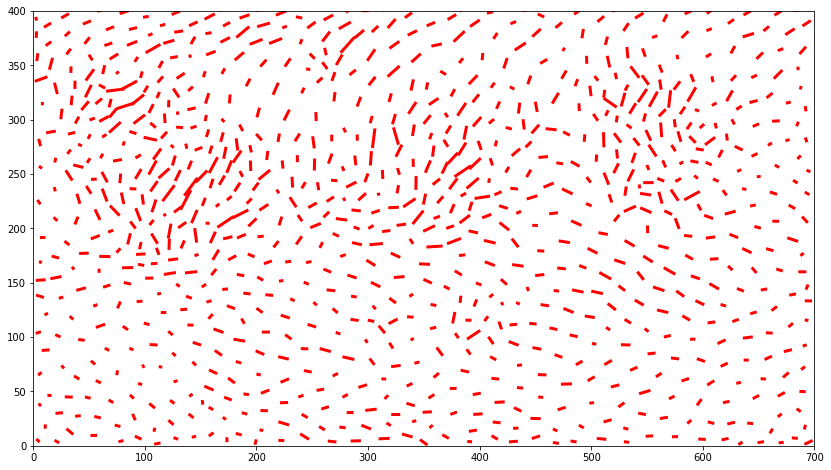

In [27]:
plt.figure(figsize=(14, 8))
plt.xlim(0, 700)
plt.ylim(0, 400)
for i in range(df.shape[0]):
    plt.plot((df.loc[i,'x1'],df.loc[i,'x2']), (df.loc[i,'y1'], df.loc[i,'y2']), 'r-', lw = 3)
plt.savefig('mmm1b.png', dpi=300)
plt.show()

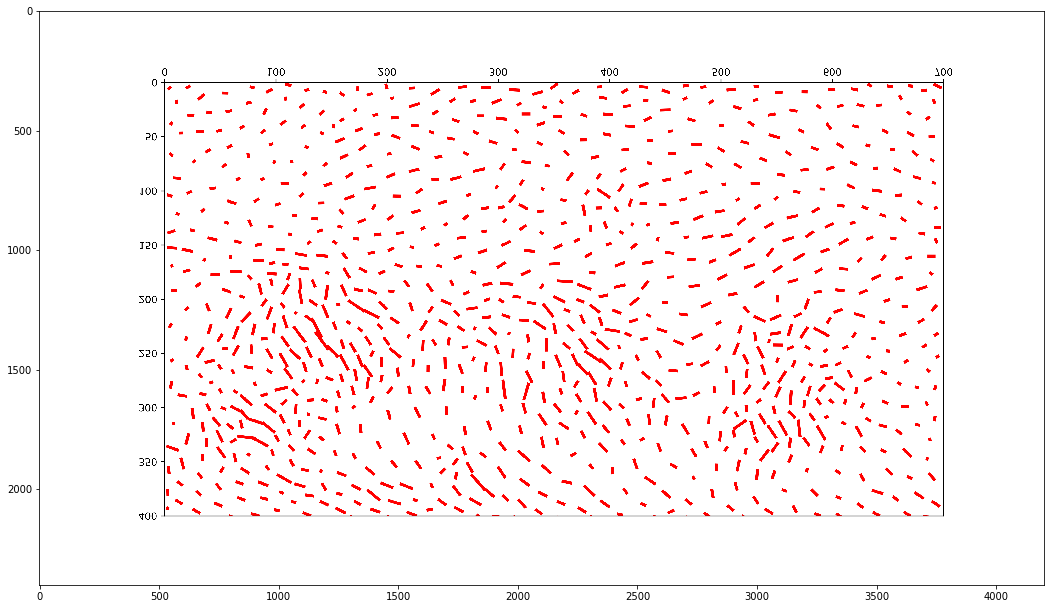

In [28]:
plt.figure(figsize=(18, 12))
im = np.flipud(plt.imread('mmm1.png'))
plt.imshow(im)
plt.savefig('mmm1flipud.png', dpi=300)
plt.show()

In [29]:
df.to_csv("matsE235_1c_crop2_fmi_polarity.csv", index=False)

In [30]:
df_re = pd.read_csv("matsE235_1c_crop2_fmi_polarity.csv")

In [31]:
df_re.head()

,center_x_cells,center_y_cells,P1_polarity_ch2,P2_polarity_ch2,nematic order,2theta,2theta_degree,theta,x_len,y_len,x1,x2,y1,y2
0,4.260870,4.840580,-0.168566,-17.106912,17.107743,4.702536,269.435445,2.351268,-12.037257,12.156452,4.742360,3.779379,4.354322,5.326838
1,10.783854,17.703125,-15.842378,2.086137,15.979140,3.010665,172.498407,1.505333,1.045307,15.944913,10.742042,10.825666,17.065328,18.340922
2,5.953704,37.685185,-1.932653,-6.934113,7.198407,4.440571,254.425963,2.220285,-4.353450,5.732761,6.127842,5.779566,37.455875,37.914496
3,5.952532,66.284810,1.550674,18.405389,18.470596,1.486744,85.184143,0.743372,13.597882,12.500421,5.408616,6.496447,65.784793,66.784827
4,11.172414,87.979310,53.883308,8.987848,54.627762,0.165280,9.469871,0.082640,54.441330,4.509313,8.994761,13.350067,87.798938,88.159683
